## Задача 1

*Постройте график\
Назовите график\
Сделайте именование оси x и оси y\
Сделайте выводы*

### Задача 1.1

*Скачать данные по ссылке https://gbcdn.mrgcdn.ru/uploads/asset/5298945/attachment/0bff2e29897ee28a9e482ff8499da7de.csv* 

In [167]:
import pandas as pd
import matplotlib.pyplot as plt

In [168]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Задача 1.2

*Изучите стоимости недвижимости*

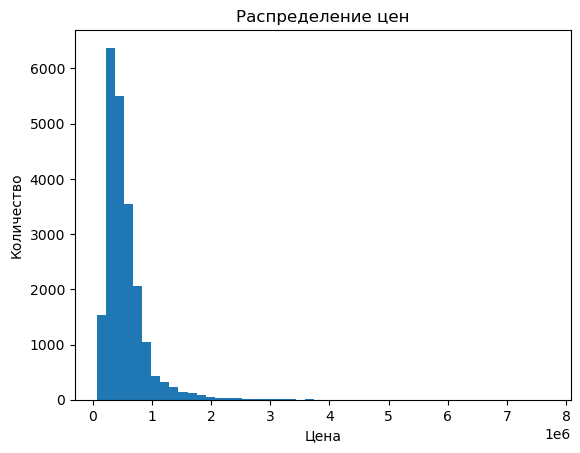

In [169]:
plt.hist(df['price'], bins=50)
plt.title('Распределение цен')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.show()

На графике видно, что в основном цены на недвижимость находятся до 1 миллиона. Есть несколько экземпляров с ценой от 2 до 4 миллионов.

### Задача 1.3

*Изучите распределение квадратуры жилой*

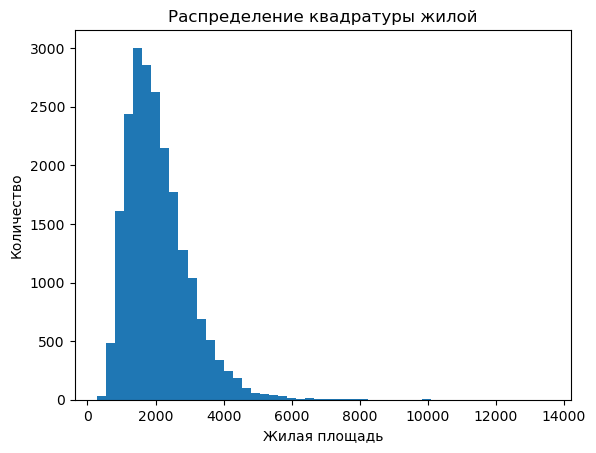

In [170]:
plt.hist(df['sqft_living'], bins=50)

plt.title('Распределение квадратуры жилой')
 # Label the x-axis and y-axis
plt.xlabel('Жилая площадь')
plt.ylabel('Количество')
plt.show()

Из графика видно, что площадь большинства жилых помещений составляет от 1000 до 3000. Есть несколько выбросов с жилой площадью более 8000.

### Задача 1.4

*Изучите распределение года постройки*

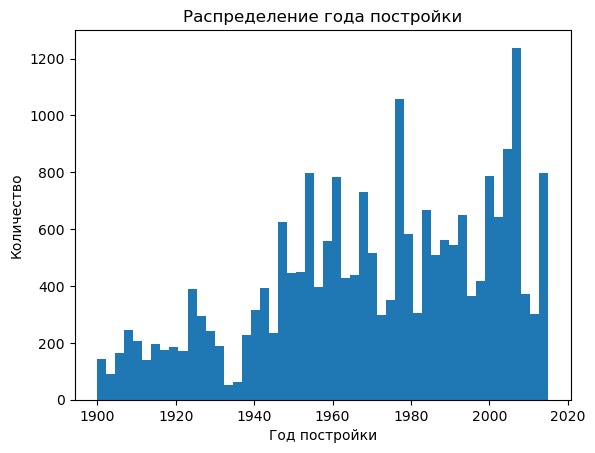

In [171]:
plt.hist(df['yr_built'], bins=50)

plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество')
plt.show()

#Based on the graph, we can see that the majority of living areas are between 0 and 150 square meters. There are a few outliers with living areas greater than 250 square meters. The distribution of living area is right-skewed, which means that there are more smaller living areas than larger living areas.

На графике видно, что после 1940 года были постоянные всплески и падения роста строительства домов. 

## Задача 2

### Задача 2.1

*Изучите распределение домов от наличия вида на набережную\
Постройте график\
Сделайте выводы*

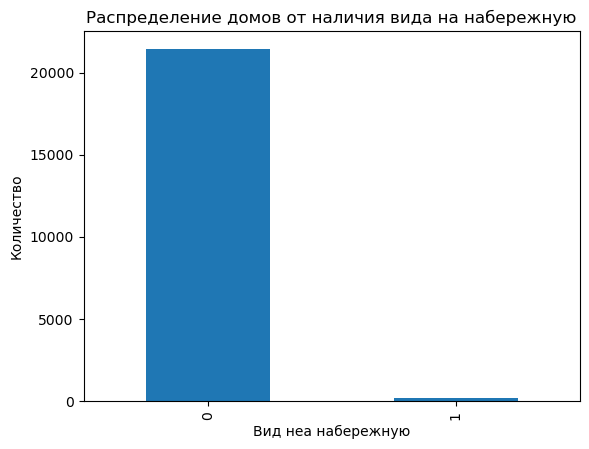

In [172]:
waterfront_counts = df['waterfront'].value_counts()

waterfront_counts.plot(kind='bar')
plt.title('Распределение домов от наличия вида на набережную')

plt.xlabel('Вид неа набережную')
plt.ylabel('Количество')

plt.show()

#Based on the graph, we can see that the majority of houses do not have a waterfront view. Only a small percentage of houses have a waterfront view.

Видно, что большинство домов не имеют вида на набережную. Несколько процентов домов имеет вид на набережную.

### Задача 2.2

*Изучите распределение этажей домов*

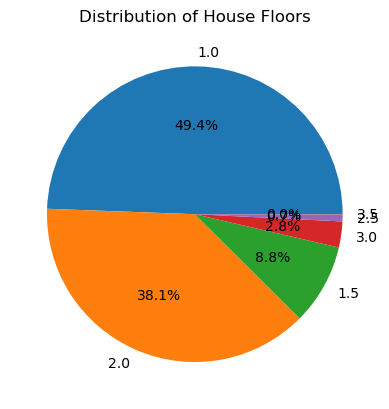

In [173]:
floor_counts = df['floors'].value_counts()

plt.pie(floor_counts, labels=floor_counts.index, autopct='%1.1f%%')
plt.title('Distribution of House Floors')

plt.show()
#Based on the pie chart, we can see that the majority of houses have between 1 and 9 floors, with 5 floors being the most common. There are very few houses with more than 9 floors.

Видим из круговой диаграммы, что большинство домов имеют 1 и 2 этажа, причем наиболее распространены 1 этажей.

### Задача 2.3

*Изучите распределение состояния домов*

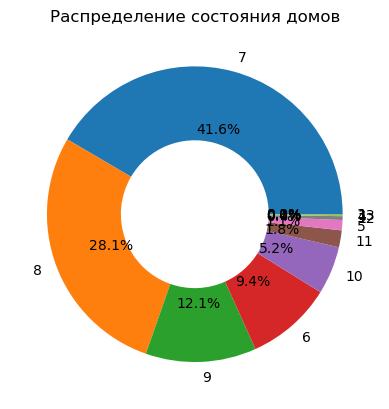

In [174]:
condition_counts = df['grade'].value_counts()
fig, ax = plt.subplots()
ax.pie(condition_counts, labels=condition_counts.index, wedgeprops=dict(width=0.5), autopct='%1.1f%%')

plt.title('Распределение состояния домов')
plt.show()

Из кольцевой диаграммы видно, что большинство домов находится в хорошем или отличном состоянии, причем около 90% домов попадают в эти категории. Лишь небольшой процент домов находится в плохом или удовлетворительном состоянии.

## Задача 3

*Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.*

### Задача 3.1

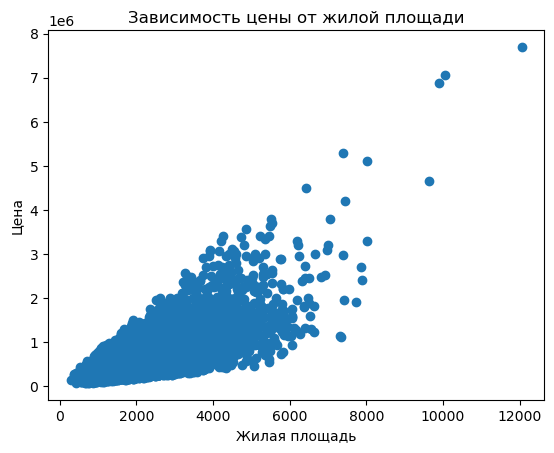

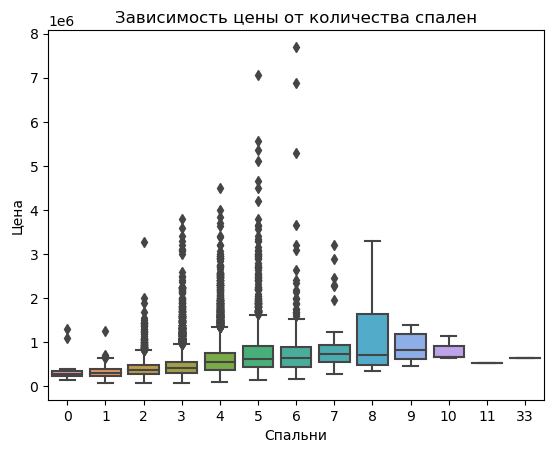

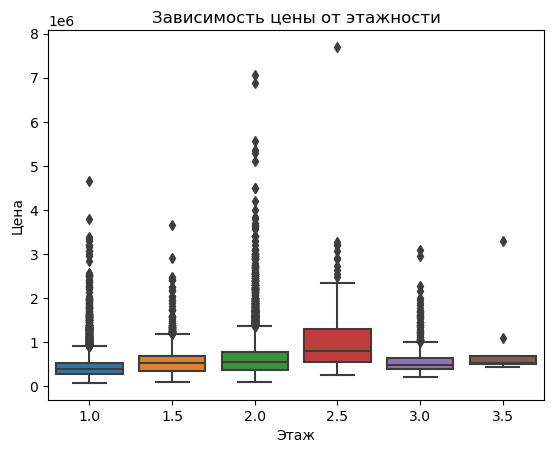

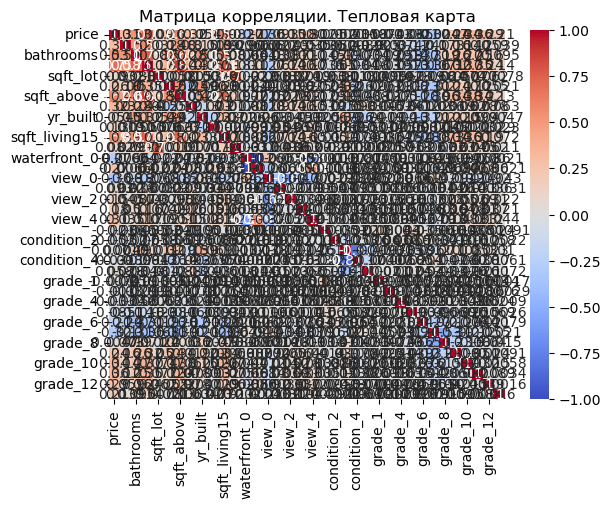

In [175]:
import seaborn as sns
from sklearn.model_selection import train_test_split

df = df.drop(['id', 'date', 'zipcode', 'lat', 'long'], axis=1)
df = df.dropna()
df = pd.get_dummies(df, columns=['waterfront', 'view', 'condition', 'grade'])

X_train, X_test, y_train, y_test = train_test_split(df.drop(['price'], axis=1), df['price'], test_size=0.2, random_state=42)
plt.scatter(X_train['sqft_living'], y_train)
plt.xlabel('Жилая площадь')
plt.ylabel('Цена')
plt.title('Зависимость цены от жилой площади')
plt.show()


sns.boxplot(x='bedrooms', y='price', data=df)
plt.xlabel('Спальни')
plt.ylabel('Цена')
plt.title('Зависимость цены от количества спален')
plt.show()


sns.boxplot(x='floors', y='price', data=df)
plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.title('Зависимость цены от этажности')
plt.show()
 # Create a correlation matrix heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции. Тепловая карта')
plt.show()

Из диаграммы зависимости цены от жилой площади видно, что имеется прямая линейная зависимсоть - чем больше площадь, тем выше цена.
Из второй диаграммы видно, что дома с 2-5 спальнями имеют много выбросов, которые влияют на анализ. Также видно прямую линейную зависимость.
Третья диаграмма показывает, что везде есть выбросы, кроме последнего ящика. Кроме того, видно, что цена почти не зависит от этажа.
Матрицу корреляции построил, но не могу убрать лишнюю информацию и увеличить размер(((. 